<a href="https://colab.research.google.com/github/renuka019/iitkproj_nov/blob/master/frophet_ML_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COVID-19 - Pandemic Situation in India!

# New Section

###Importing the required libraries

In [ ]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

## Reading the Datasets


In [ ]:
#Learn how to read a .csv file by creating a dataframe using pandas
# Reading the datasets
df= pd.read_excel('Book1.xlsx')
df_india = df.copy()
df1= df_india.copy()

df

,Date,Total No. of Cases,Day-wise New Cases,Total No. of Recovered,Day-wise New Recovered,Total No. of Death,Day-wise New Death
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,0,0,0,0,0
2,2020-02-01,0,0,0,0,0,0
3,2020-02-02,1,1,0,0,0,0
4,2020-02-03,1,0,0,0,0,0
...,...,...,...,...,...,...,...
271,2020-10-27,7988853,42965,7257278,58429,119463,511
272,2020-10-28,8038765,49912,7313872,56594,119977,514
273,2020-10-29,8088046,49281,7371739,57867,120539,562
274,2020-10-30,8136166,48120,7430744,59005,121089,550


In [ ]:
df1.plot()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f745035abf8> (for post_execute):


ValueError: ignored

ValueError: ignored

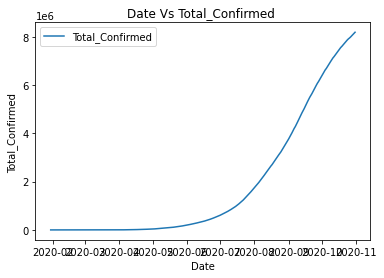

In [ ]:
date = df.iloc[:,0].values
#X=pd.DataFrame(X)
#print(date)
TC= df.iloc[:,1].values
#print(TC)


#y=pd.DataFrame(y)
#y=pd.DataFrame(y)
plt.title("Date Vs Total_Confirmed ")
plt.xlabel("Date")
plt.ylabel("Total_Confirmed ")
plt.plot(date,TC)
plt.legend(['Total_Confirmed'])


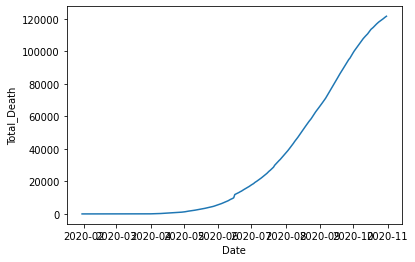

In [ ]:
date = df.iloc[:,0].values
#X=pd.DataFrame(X)
#print(date)

TD = df.iloc[:,-2]

#y=pd.DataFrame(y)
plt.xlabel("Date")
plt.ylabel("Total_Death")
plt.plot(date,TD)

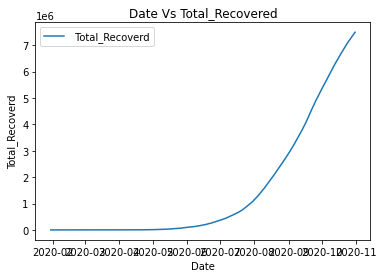

In [ ]:
date = df.iloc[:,0].values
#X=pd.DataFrame(X)
#print(date)

TR = df.iloc[:,-4]

#y=pd.DataFrame(y)
plt.xlabel("Date")
plt.ylabel("Total_Recoverd")
plt.plot(date,TR)
plt.title("Date Vs Total_Recovered")

plt.legend([' Total_Recoverd'])    
plt.show()

In [ ]:
df1 =  pd.read_excel('Book1.xlsx',index_col =0)
df1

,Total No. of Cases,Day-wise New Cases,Total No. of Recovered,Day-wise New Recovered,Total No. of Death,Day-wise New Death
Date,,,,,,
2020-01-30,1,1,0,0,0,0
2020-01-31,0,0,0,0,0,0
2020-02-01,0,0,0,0,0,0
2020-02-02,1,1,0,0,0,0
2020-02-03,1,0,0,0,0,0
...,...,...,...,...,...,...
2020-10-27,7988853,42965,7257278,58429,119463,511
2020-10-28,8038765,49912,7313872,56594,119977,514
2020-10-29,8088046,49281,7371739,57867,120539,562


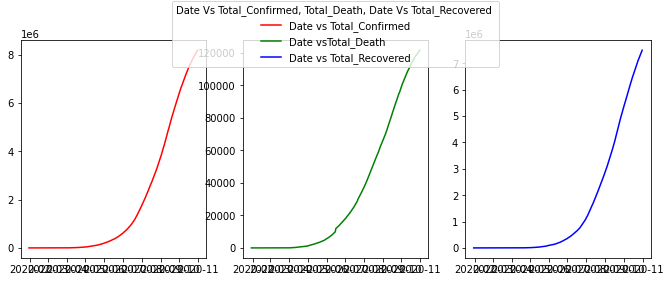

In [ ]:
date = df.iloc[:,0].values
#X=pd.DataFrame(X)
#print(date)

TC = df.iloc[:,1]
TD = df.iloc[:,-2]
TR = df.iloc[:,-4]

line_labels = ["Date vs Total_Confirmed","Date vsTotal_Death" ,"Date vs Total_Recovered"]
fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))
# Create the sub-plots, assigning a different color for each line.
# Also store the line objects created
l1 = ax1.plot(date, TC, color="red")[0]
l2 = ax2.plot(date, TD, color="green")[0]
l3 = ax3.plot(date, TR, color="blue")[0]

# Create the legend
fig.legend([l1, l2, l3],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper center",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title= "Date Vs Total_Confirmed, Total_Death, Date Vs Total_Recovered ")

plt.subplots_adjust(right=1.0)

plt.show()


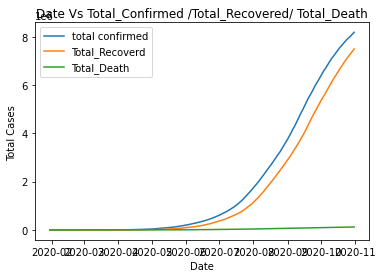

In [ ]:
#y=pd.DataFrame(y)
TCDR = df.iloc[:,[1,3,5]].values
#print(TCDR)
plt.title("Date Vs Total_Confirmed /Total_Recovered/ Total_Death")
plt.xlabel("Date")
plt.ylabel("Total Cases ")
plt.plot(date,TCDR)
plt.legend(['total confirmed','Total_Recoverd','Total_Death'])   
plt.show()

In [ ]:
df.groupby('Date').sum()

,Total No. of Cases,Day-wise New Cases,Total No. of Recovered,Day-wise New Recovered,Total No. of Death,Day-wise New Death
Date,,,,,,
2020-01-30,1,1,0,0,0,0
2020-01-31,0,0,0,0,0,0
2020-02-01,0,0,0,0,0,0
2020-02-02,1,1,0,0,0,0
2020-02-03,1,0,0,0,0,0
...,...,...,...,...,...,...
2020-10-27,7988853,42965,7257278,58429,119463,511
2020-10-28,8038765,49912,7313872,56594,119977,514
2020-10-29,8088046,49281,7371739,57867,120539,562


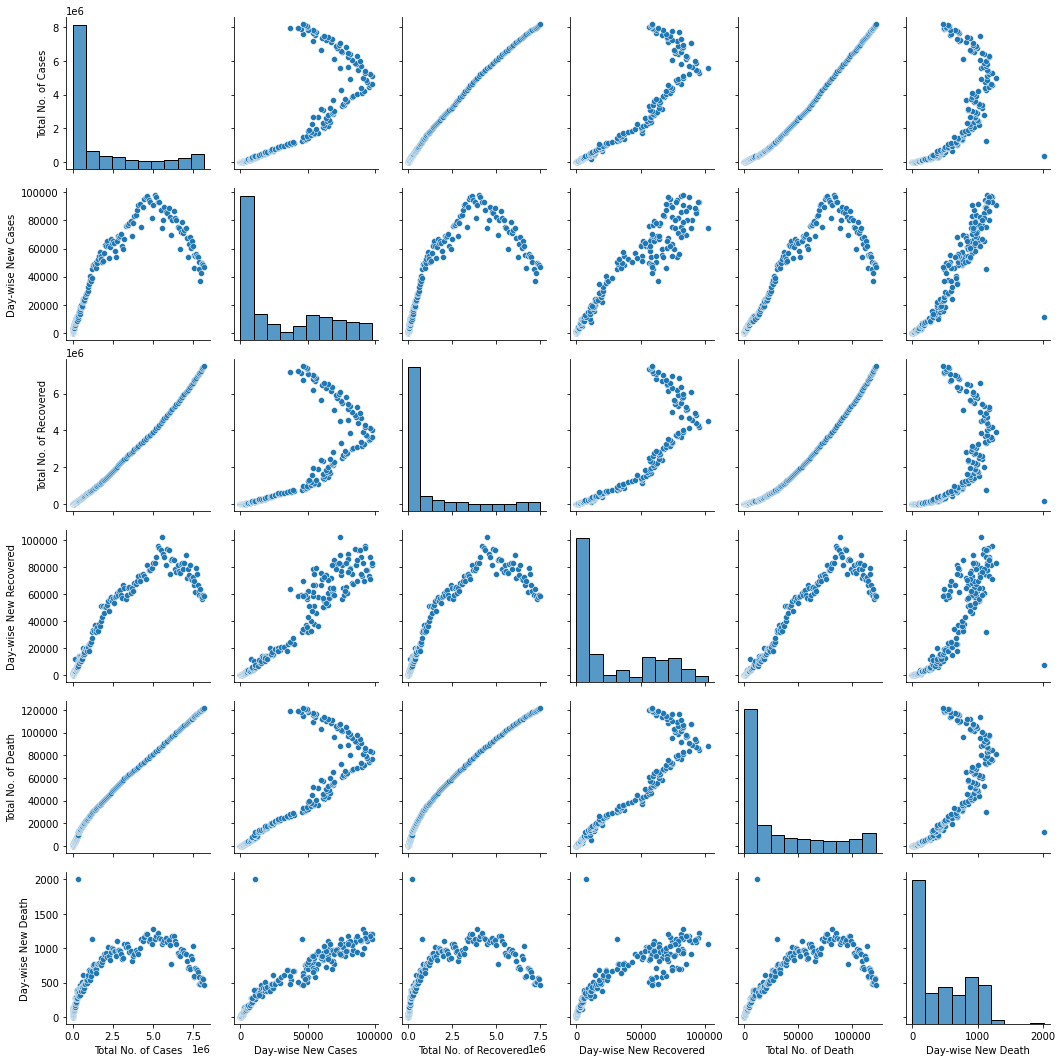

In [ ]:
sns.pairplot(df1)

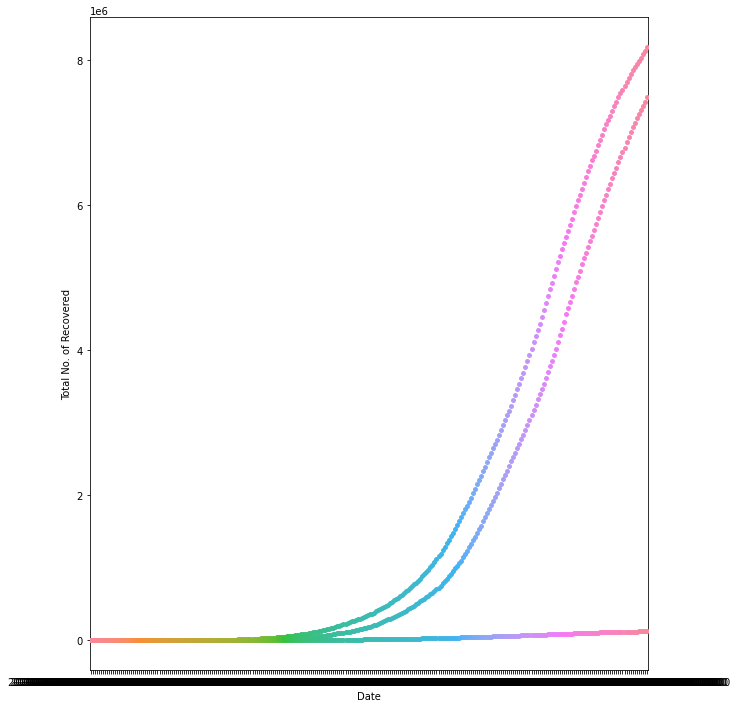

In [ ]:
sns.swarmplot(x ='Date', y ='Total No. of Cases', data = df)
sns.swarmplot(x ='Date', y ='Total No. of Death', data = df)
sns.swarmplot(x ='Date', y ='Total No. of Recovered', data = df)

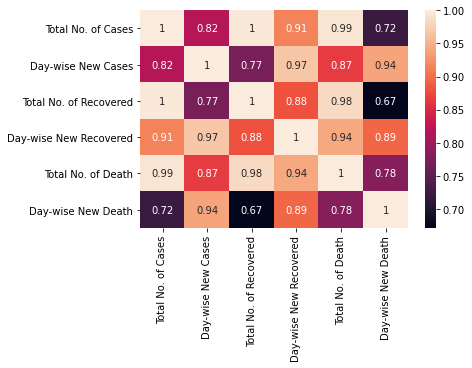

In [ ]:
corr_mat=df.corr()
sns.heatmap(corr_mat,annot=True)


# Forecasting Total Number of Cases in INDIA


In [ ]:
from fbprophet import Prophet

          Date  Total No. of Cases  Total No. of Death  Total No. of Recovered
0   2020-01-30                   1                   0                       0
1   2020-01-31                   0                   0                       0
2   2020-02-01                   0                   0                       0
3   2020-02-02                   1                   0                       0
4   2020-02-03                   1                   0                       0
..         ...                 ...                 ...                     ...
271 2020-10-27             7988853              119463                 7257278
272 2020-10-28             8038765              119977                 7313872
273 2020-10-29             8088046              120539                 7371739
274 2020-10-30             8136166              121089                 7430744
275 2020-10-31             8182881              121559                 7489426

[276 rows x 4 columns]
          Date  Total No. of

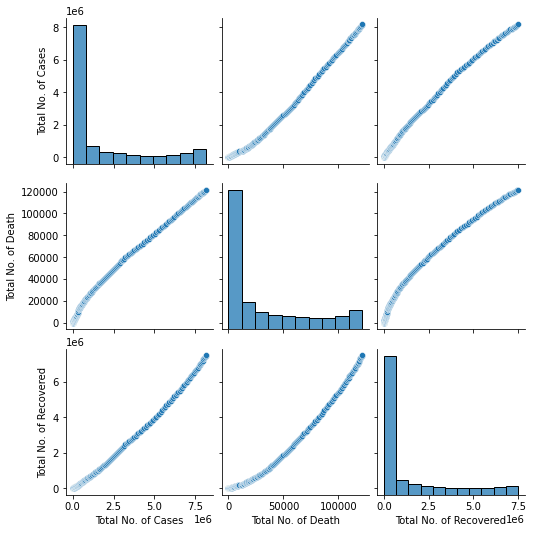

In [ ]:
Total_Confirmed = df_india[['Date','Total No. of Cases','Total No. of Death','Total No. of Recovered']].reset_index(drop=True)
print(Total_Confirmed)
Total_Death = df_india[['Date','Total No. of Death']].reset_index(drop=True)
print(Total_Death)
Total_Recovered = df_india[['Date','Total No. of Recovered']].reset_index(drop=True)
#print(Total_Recovered)
sns.pairplot(Total_Confirmed)


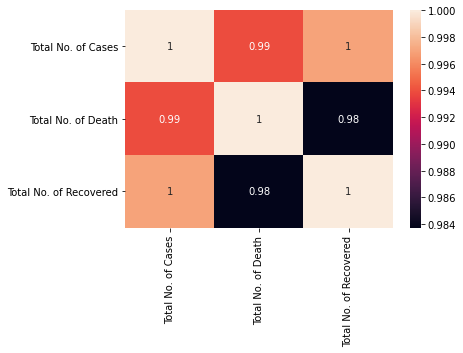

In [ ]:
corr_mat=Total_Confirmed.corr()
sns.heatmap(corr_mat,annot=True)


In [ ]:
Total_Confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
Total_Confirmed['ds'] = pd.to_datetime(Total_Confirmed['ds'])

In [ ]:
Total_Confirmed.tail()

,ds,y
271,2020-10-27,7988853
272,2020-10-28,8038765
273,2020-10-29,8088046
274,2020-10-30,8136166
275,2020-10-31,8182881


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(Total_Confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
278,2020-11-03
279,2020-11-04
280,2020-11-05
281,2020-11-06
282,2020-11-07


The **predict** method will assign each row in future a predicted value which it names **yhat**. 

In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
278,2020-11-03,8.741720e+06,8.613459e+06,8.873457e+06
279,2020-11-04,8.818058e+06,8.697906e+06,8.951368e+06
280,2020-11-05,8.894283e+06,8.762685e+06,9.017693e+06
281,2020-11-06,8.970118e+06,8.843718e+06,9.103571e+06
282,2020-11-07,9.046085e+06,8.921857e+06,9.182023e+06


You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

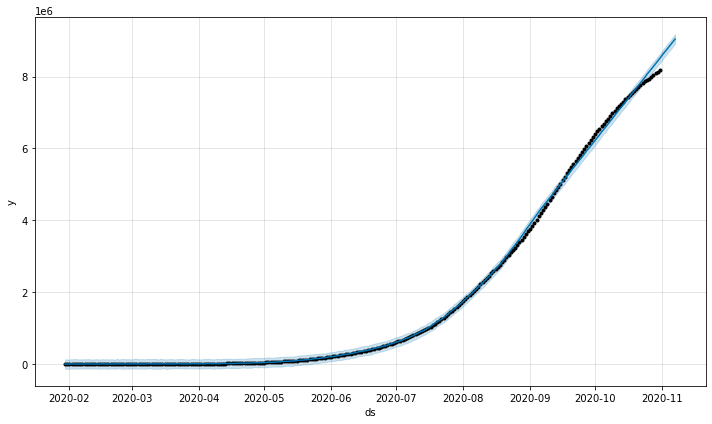

In [ ]:
Confirmed_forecast_plot = m.plot(forecast)

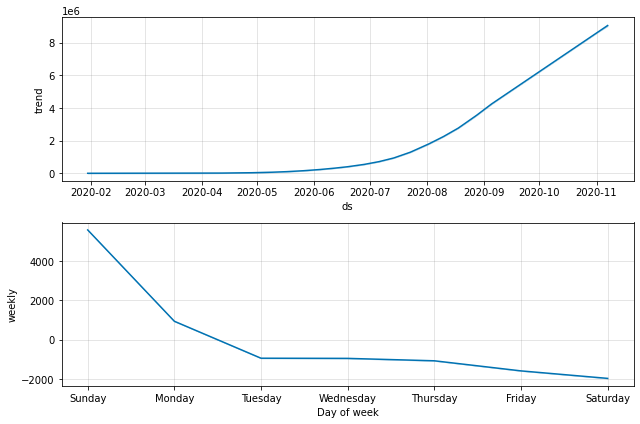

In [ ]:
Confirmed_forecast_plot =m.plot_components(forecast)

## Forecasting Total_Death using Prophet

Generating a week ahead forecast of confirmed Total_Deceased cases of COVID-19 using Prophet, with 95% prediction interval by creating a base model.

In [ ]:
Total_Death.columns = ['ds','y']
Total_Death['ds'] = pd.to_datetime(Total_Death['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(Total_Death)
future = m.make_future_dataframe(periods=8)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
279,2020-11-04
280,2020-11-05
281,2020-11-06
282,2020-11-07
283,2020-11-08


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
279,2020-11-04,130041.895260,128479.432912,131776.246310
280,2020-11-05,131004.511650,129429.272122,132721.997914
281,2020-11-06,131960.200081,130318.847472,133641.906301
282,2020-11-07,132903.512419,131070.272454,134554.767480
283,2020-11-08,133958.240112,132312.724940,135771.749800


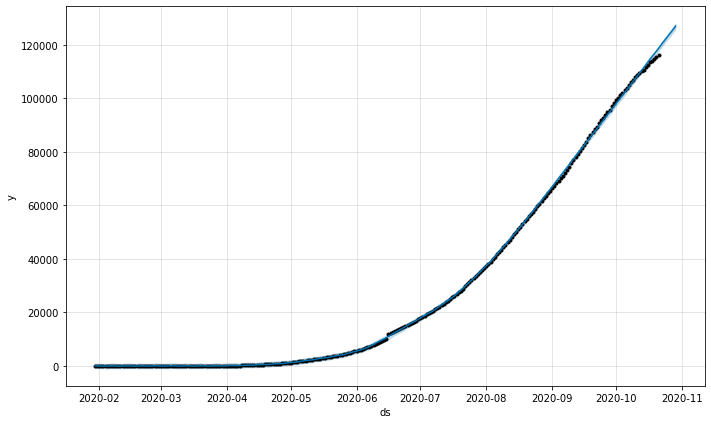

In [ ]:
Death_forecast_plot = m.plot(forecast)

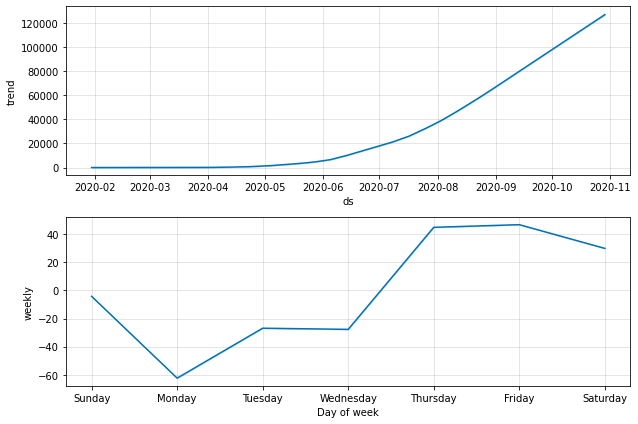

In [ ]:
Death_forecast_plot = m.plot_components(forecast)

## Forecasting Total_Recovered Cases with Prophet.

Generating a week ahead forecast of Total_Recovered cases of COVID-19 using Prophet, with 95% prediction interval by creating a base model.

In [ ]:
Total_Recovered.columns = ['ds','y']
Total_Recovered['ds'] = pd.to_datetime(Total_Recovered['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(Total_Recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
278,2020-11-03
279,2020-11-04
280,2020-11-05
281,2020-11-06
282,2020-11-07


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
278,2020-11-03,7.907209e+06,7.849620e+06,7.968359e+06
279,2020-11-04,7.986357e+06,7.925483e+06,8.047310e+06
280,2020-11-05,8.065526e+06,8.000572e+06,8.126778e+06
281,2020-11-06,8.144764e+06,8.080438e+06,8.207440e+06
282,2020-11-07,8.224780e+06,8.157022e+06,8.292083e+06


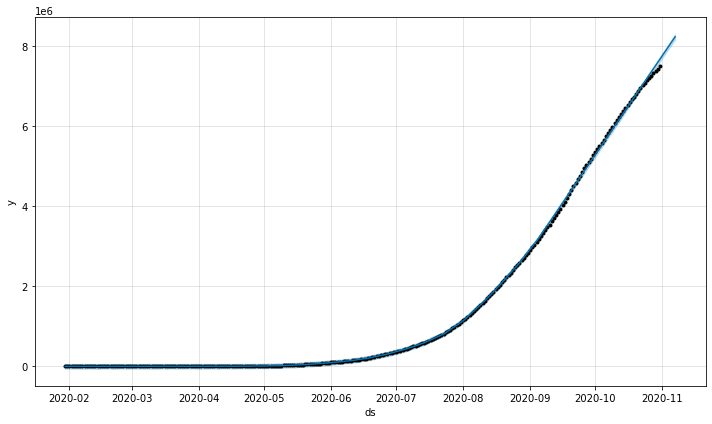

In [ ]:
recovered_forecast_plot = m.plot(forecast)

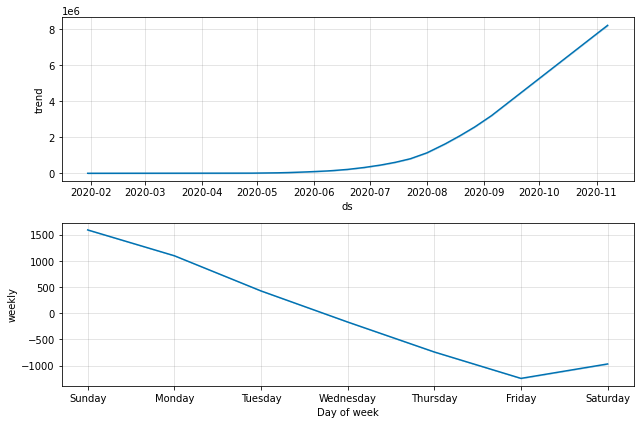

In [ ]:
recovered_forecast_plot = m.plot_components(forecast)
